In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from datasets import load_dataset

In [6]:
dataset = load_dataset("divyasharma0795/AppleVisionPro_Tweets")

Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
tweets_df = pd.DataFrame(dataset["train"])
tweets_df.sample(5)

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt
11698,1760613949861699971,What would it be like to wear Apple Vision Pro...,https://twitter.com/AsherSiegel01/status/17606...,tweet,Asher Siegel,@AsherSiegel01,2,0,0,0,94,0,2024-02-22 05:34:10
26497,1744358907663782106,Apple ( $AAPL ) Vision Pro available in the U....,https://twitter.com/ScytaleNews/status/1744358...,tweet,STN,@ScytaleNews,0,0,0,1,54,0,2024-01-08 09:02:26
13733,1758337998662602985,I want to play a game with a few of you but th...,https://twitter.com/Roobet/status/175833799866...,tweet,Roobet,@Roobet,45,0,10,64,4036,0,2024-02-15 22:50:21
22515,1748763042605633774,"Apple Vision Pro incorpora una cámara 3D de 6,...",https://twitter.com/hardfanaticos/status/17487...,tweet,FanáticosDelHardware,@hardfanaticos,0,0,0,1,156,0,2024-01-20 12:42:54
6865,1757523459855225191,Mood. #AppleVisionPro https://t.co/vEB5DV6dnx,https://twitter.com/remington/status/175752345...,tweet,Remington,@remington,0,0,0,0,66,0,2024-02-13 13:53:40


In [8]:
tweets_df.describe()

,id,replyCount,quoteCount,retweetCount,likeCount,bookmarkCount
count,2.670400e+04,26704.000000,26704.000000,26704.000000,26704.000000,26704.000000
mean,1.756400e+18,1.280033,0.296772,2.539545,13.620918,1.017039
std,5.655286e+15,11.620621,6.207672,57.278691,237.577875,18.635331
min,1.741619e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.755151e+18,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.756995e+18,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.759700e+18,1.000000,0.000000,0.000000,3.000000,0.000000
max,1.769459e+18,871.000000,583.000000,5812.000000,20992.000000,1229.000000


In [9]:
# tweets_df = tweets_df[["id", "tweetText", "createdAt"]]
tweets_df.sample(5)

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt
21406,1750896676611436640,First thing I would watch with an #AppleVision...,https://twitter.com/ApplWatcher/status/1750896...,tweet,Watcher,@ApplWatcher,0,0,0,1,218,0,2024-01-26 10:01:12
4002,1760063437663592888,@patchedreality Fashionable as well! \n\n@Appl...,https://twitter.com/vrarchicago/status/1760063...,tweet,VRAR Chicago,@vrarchicago,0,0,0,1,56,0,2024-02-20 14:06:38
12099,1760084958276722820,My current evening productivity setup in our k...,https://twitter.com/ASychov/status/17600849582...,tweet,Artur Sychov ᯅ,@ASychov,5,1,6,65,4177,2,2024-02-20 18:32:09
22802,1748547725908668455,アメージングとしか言いようがない🤯🥽 #Apple #AppleVisionPro,https://twitter.com/tetsucreative/status/17485...,tweet,Tetsu,@tetsucreative,0,0,0,1,58,0,2024-01-19 22:27:18
23360,1748382347047891439,Apple Vision Pro。製造過程の映像が実に近未来的。\n#AppleVision...,https://twitter.com/DestinyVoyage/status/17483...,tweet,Voyage of Destiny ・ᴥ・,@DestinyVoyage,0,0,0,0,199,0,2024-01-19 11:30:09


In [10]:
tweets_df["tweetTextCleaned"] = tweets_df["tweetText"]

In [11]:
# Remove hashtags from tweet
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.replace(
    r"#\w+", "", regex=True
)

In [12]:
# REmove mentions from tweet
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.replace(
    r"@\w+", "", regex=True
)

In [13]:
# Remove URLs from tweet
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.replace(
    r"http\S+", "", regex=True
)

In [14]:
# Removing special characters
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.replace(
    r"[^\w\s]", "", regex=True
)

In [15]:
# Removing extra spaces
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.replace(
    r"\s+", " ", regex=True
)

In [16]:
# Lowercasing the text
tweets_df["tweetTextCleaned"] = tweets_df["tweetTextCleaned"].str.lower()

In [17]:
tweets_df.sample(5)

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned
23157,1748414333673996727,Anticipating the experience with the enhanced ...,https://twitter.com/Ifiokusen3Bird/status/1748...,tweet,TopBoy🤞,@Ifiokusen3Bird,0,0,0,7,133,0,2024-01-19 13:37:15,anticipating the experience with the enhanced ...
21656,1750141386236530829,@GrantGibson1969 @thelordofentry #AppleVisionP...,https://twitter.com/RodolfoPozoA/status/175014...,tweet,CryptoRodo,@RodolfoPozoA,0,0,0,1,69,0,2024-01-24 07:59:57,is all set to release on february 2 ill be wa...
16236,1756628391917158875,ആപ്പിള്‍ ആരാധകര്‍ 'എന്തുവിലയ്ക്കും' ഒരു വിഷന്‍...,https://twitter.com/manoramaonline/status/1756...,tweet,Manorama Online,@manoramaonline,0,0,0,0,339,0,2024-02-11 05:36:59,ആപപള ആരധകര എനതവലയകക ഒര വഷന പര വങങകകന ശരമകകനനത ...
5322,1758529965815906565,Another friday another #podcast! Hitting on #X...,https://twitter.com/hitmanbk/status/1758529965...,tweet,Hitmanbk,@hitmanbk,0,0,2,1,59,0,2024-02-16 08:33:10,another friday another hitting on and the most...
14277,1758009871235207183,YouTuber's 50-hour Apple Vision Pro adventure ...,https://twitter.com/IndiaToday/status/17580098...,tweet,IndiaToday,@IndiaToday,0,0,0,3,1831,0,2024-02-15 01:06:30,youtubers 50hour apple vision pro adventure go...


In [18]:
from translate import Translator
from textblob import TextBlob
from langdetect import detect

translator = Translator(to_lang="en")
translated_text = []

# Loop through the DataFrame
for text in tweets_df["tweetTextCleaned"]:
    # Skip if the text is empty or very short
    if not text or len(text) < 3:
        translated_text.append(text)
        continue

    blob = TextBlob(text)

    # If the text is not in English, translate it
    try:
        if detect(text) != "en":
            text = translator.translate(text)
            blob = TextBlob(text)
    except Exception as e:
        print(f"Error: {e}. Skipping text: {text}")

    # Append the translated text to the list
    translated_text.append(text)

# Add the translated text to the DataFrame
tweets_df["translated_text"] = translated_text

# Display a sample of the data
tweets_df.sample(5)

Error: No features in text.. Skipping text:  01 
Error: No features in text.. Skipping text: 𝐀𝐏𝐏𝐋𝐄 𝐕𝐈𝐒𝐈𝐎𝐍 𝐏𝐑𝐎 𝐔𝐍𝐕𝐄𝐈𝐋𝐈𝐍𝐆 𝐓𝐇𝐄 𝐋𝐀𝐓𝐄𝐒𝐓 𝐁𝐑𝐄𝐀𝐊𝐓𝐇𝐑𝐎𝐔𝐆𝐇 𝐈𝐍 𝐕𝐑 𝐓𝐄𝐂𝐇𝐍𝐎𝐋𝐎𝐆𝐘 read more 
Error: No features in text.. Skipping text:  666 
Error: No features in text.. Skipping text: 𝙁𝙞𝙣𝙖𝙡𝙡𝙮 𝙩𝙝𝙞𝙨 𝙞𝙨 𝙢𝙞𝙣𝙚 
Error: No features in text.. Skipping text:  1 2 3 4 5 6 7 8 9 10 
Error: No features in text.. Skipping text:  ᯅ 
Error: No features in text.. Skipping text:  3500 
Error: No features in text.. Skipping text:  ___________________ 
Error: No features in text.. Skipping text: 𝐀𝐩𝐩𝐥𝐞 𝐕𝐢𝐬𝐢𝐨𝐧 𝐏𝐫𝐨 𝐌𝐢𝐬𝐮𝐬𝐞𝐝 𝐇𝐮𝐠𝐞 𝐏𝐫𝐢𝐜𝐞 𝐃𝐫𝐨𝐩 𝐨𝐧 𝐌𝐆 𝐄𝐥𝐞𝐜𝐭𝐫𝐢𝐜 𝐂𝐚𝐫𝐬 𝐄𝐭𝐜 𝐈𝐧𝐭𝐞𝐫𝐞𝐬𝐭𝐢𝐧𝐠 𝐄𝐯 𝐧𝐞𝐰𝐬 
Error: No features in text.. Skipping text: ㅝㅓㅓㅗㅗㅗㅗㅗ 
Error: No features in text.. Skipping text:  ᯅ 
Error: No features in text.. Skipping text: vision pro 𝙚𝙙𝙬𝙖𝙧𝙙𝙨𝙖𝙞𝙣𝙩𝙡𝙖𝙪𝙧𝙚𝙣𝙩 𝘼𝙡𝙡 𝙧𝙞𝙜𝙝𝙩𝙨 𝙧𝙚𝙨𝙚𝙧𝙫𝙚𝙙 
Error: No features in text.. Skipping text: 𝐇𝐨𝐥𝐲 𝐀𝐩𝐩𝐥𝐞 𝐕𝐢𝐬𝐢𝐨𝐧 𝐏𝐫𝐨 𝑻𝒉𝒆 𝒑𝒓𝒐𝒎𝒑𝒕 𝒊𝒔 𝒊𝒏 𝒕𝒉𝒆 𝒅𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏 
Error: No features in text.. Skipping text:  666 
Err

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned,translated_text
16009,1756772994695807263,"Ну что, можно ли назвать 2024 год переломным д...",https://twitter.com/AppleProNews/status/175677...,tweet,Applepro.news,@AppleProNews,0,0,0,0,25,0,2024-02-11 15:11:35,ну что можно ли назвать 2024 год переломным дл...,ну что можно ли назвать 2024 год переломным дл...
18925,1755431802339205219,The Future is Here‼️\n#AppleVisionPro https://...,https://twitter.com/breakingtech__/status/1755...,tweet,BreakingTech,@breakingtech__,1,0,0,1,122,0,2024-02-07 22:22:10,the future is here,the future is here
11931,1760307172888506648,Il est en kiffe total 😂 #TEAMG1 #AppleVisionPr...,https://twitter.com/gameone/status/17603071728...,tweet,Game One,@gameone,17,1,11,166,9602,0,2024-02-21 09:15:09,il est en kiffe total,il est en kiffe total
1445,1764876452774764985,Wow okay so Personas on #AppleVisionPro were t...,https://twitter.com/hassanahmed120/status/1764...,tweet,Hassan Ahmed,@hassanahmed120,0,0,0,5,382,0,2024-03-04 20:51:50,wow okay so personas on were technologically i...,wow okay so personas on were technologically i...
15762,1756971222124904468,Apple Vision Pro Could Take Four Generations t...,https://twitter.com/khanze0419/status/17569712...,tweet,Khan Ze,@khanze0419,0,0,0,0,19,0,2024-02-12 04:19:16,apple vision pro could take four generations t...,apple vision pro could take four generations t...


In [19]:
# Sentiment Analysis of text using textBlob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

sentiments = []
for text in tweets_df["translated_text"]:
    blob = TextBlob(text)

    # Append the sentiment value to the list
    sentiments.append(blob.sentiment.polarity)

# Add the sentiment values to the DataFrame
tweets_df["sentiment_blob"] = sentiments

# Display a sample of the data
tweets_df.sample(5)

,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned,translated_text,sentiment_blob
6497,1757771518749106293,Mark Zuckerberg probó las #AppleVisionPro y di...,https://twitter.com/jmatuk/status/175777151874...,tweet,Javier Matuk,@jmatuk,96,11,70,568,62438,59,2024-02-14 06:19:22,mark zuckerberg probó las y dice que son buena...,mark zuckerberg probó las y dice que son buena...,0.000000
24537,1747497223565492337,"This will crash any iphone, we tested on multi...",https://twitter.com/TekSaiyan/status/174749722...,tweet,Teksaiyan,@TekSaiyan,0,0,0,0,127,0,2024-01-17 00:52:59,this will crash any iphone we tested on multip...,this will crash any iphone we tested on multip...,0.000000
22231,1749173182991393100,A New Chapter in XR and Metaverse: Apple Visio...,https://twitter.com/PatrickRogosch/status/1749...,tweet,Patrick Rogosch,@PatrickRogosch,0,0,0,0,88,0,2024-01-21 15:52:39,a new chapter in xr and metaverse apple vision...,a new chapter in xr and metaverse apple vision...,0.136364
15308,1757298658834563086,أسهم إطلاق #أبل #فيجين_برو في إثارة حالة من ال...,https://twitter.com/CNNBusinessAr/status/17572...,tweet,CNN Business Arabic | الاقتصادية CNN,@CNNBusinessAr,0,0,0,2,1157,0,2024-02-13 02:00:23,أسهم إطلاق في إثارة حالة من الجدل بشأن إمكانات...,أسهم إطلاق في إثارة حالة من الجدل بشأن إمكانات...,0.000000
24052,1748264587101970781,スタッフの気になること ・ 1月 第3週 ｜SIFCA @SIFCA_jp #note #N...,https://twitter.com/SIFCA_jp/status/1748264587...,tweet,SIFCA,@SIFCA_jp,0,0,0,0,35,0,2024-01-19 03:42:13,スタッフの気になること 1月 第3週 sifca,スタッフの気になること 1月 第3週 sifca,0.000000


In [20]:
tweets_df.to_csv("tweets_with_1_model.csv", index=False)

In [21]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Download the VADER lexicon file
nltk.download("vader_lexicon")

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    # Compute the sentiment scores
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores["compound"]


# Apply the function to the 'translated_text' column
sentiments = [
    get_sentiment(text)
    for text in tqdm(tweets_df["translated_text"], desc="Predicting")
]

# Add the sentiments to the DataFrame
tweets_df["sentiment_vader"] = sentiments

# Display a sample of the data
tweets_df.sample(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Predicting: 100%|██████████| 26704/26704 [00:04<00:00, 5672.61it/s]


,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned,translated_text,sentiment_blob,sentiment_vader
5600,1758349446151393512,Share the magic of Apple Vision Pro with a fri...,https://twitter.com/farjana_writer/status/1758...,tweet,Farjana Savings,@farjana_writer,0,0,0,0,26,0,2024-02-15 20:35:51,share the magic of apple vision pro with a fri...,share the magic of apple vision pro with a fri...,0.30,0.8625
17673,1755892692645716150,love everything about this \n\n#AppleVisionPro...,https://twitter.com/loughtv/status/17558926926...,tweet,🇵🇭100T Lough,@loughtv,10,0,4,173,8440,9,2024-02-09 04:53:35,love everything about this,love everything about this,0.50,0.6369
21266,1751490885806879130,Will be picking up my Apple Vision Pro next Fr...,https://twitter.com/KeldenLin/status/175149088...,tweet,Kelden Lin ᯅ,@KeldenLin,0,0,0,0,112,0,2024-01-28 01:22:22,will be picking up my apple vision pro next fr...,will be picking up my apple vision pro next fr...,0.00,0.2500
1443,1764882375765381245,Automated Zombies https://t.co/iFo102k1JB via ...,https://twitter.com/dissolvethecage/status/176...,tweet,Keith Joyner,@dissolvethecage,0,0,0,0,68,0,2024-03-04 21:15:22,automated zombies via digital lobotomies are a...,automated zombies via digital lobotomies are a...,0.35,0.7269
13166,1758769447827902778,we transcend our creative limits destined to e...,https://twitter.com/Altcoinbax/status/17587694...,tweet,Bomberbax,@Altcoinbax,2,0,0,2,106,0,2024-02-17 03:24:47,we transcend our creative limits destined to e...,we transcend our creative limits destined to e...,0.25,0.4404


In [22]:
tweets_df.to_csv("tweets_with_2_models.csv", index=False)

In [23]:
import torch.nn.functional as F

from transformers import RobertaTokenizer
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(
    "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
)
model = AutoModelForSequenceClassification.from_pretrained(
    "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
)


class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]


# Create a DataLoader
dataset = TextDataset(tweets_df["translated_text"].tolist())
dataloader = DataLoader(dataset, batch_size=5)


def get_sentiments(dataloader):
    sentiments = []
    for texts in tqdm(dataloader, desc="Predicting"):
        inputs = tokenizer.batch_encode_plus(
            texts,
            return_tensors="pt",
            max_length=256,
            truncation=True,
            padding="max_length",
        )

        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1)
        sentiment = [model.config.id2label[prob.argmax().item()] for prob in probs]
        sentiments.extend(sentiment)

    return sentiments


# Apply the function to the 'translated_text' column
tweets_df["sentiment_distilbert"] = get_sentiments(dataloader)

# Display a sample of the data
tweets_df.sample(5)

Predicting: 100%|██████████| 5341/5341 [20:32<00:00,  4.33it/s]


,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned,translated_text,sentiment_blob,sentiment_vader,sentiment_distilbert
12875,1759133634089353652,@Ashraf_Cryptome عاشت ايدك عزيزي اشرف 🫶🏻 $APE ...,https://twitter.com/salieemcrypto/status/17591...,tweet,Saleem.₿🦅,@salieemcrypto,1,0,1,6,1112,0,2024-02-18 03:31:56,عاشت ايدك عزيزي اشرف ape من اهم عملات و مشاري...,عاشت ايدك عزيزي اشرف ape من اهم عملات و مشاري...,0.0000,0.0000,positive
5285,1758544268736577566,TikTok’s native app became a part of Vision Pr...,https://twitter.com/Dsiliconreview/status/1758...,tweet,The Silicon Review,@Dsiliconreview,0,0,0,0,54,0,2024-02-16 09:30:00,tiktoks native app became a part of vision pro,tiktoks native app became a part of vision pro,0.0000,0.2500,positive
3352,1760987246830723176,@futureverse @UltiverseDAO soon releasing its ...,https://twitter.com/MayurSolid/status/17609872...,tweet,Cryp on .5irefam Ultiverse⚡️🐑,@MayurSolid,0,0,0,0,109,0,2024-02-23 03:17:31,soon releasing its ecosystem on is there any ...,soon releasing its ecosystem on is there any ...,0.0000,0.2500,positive
7031,1757425690469609907,@MKBHD has made a vid talking about what's mi...,https://twitter.com/gandabilt/status/175742569...,tweet,Gandabilt,@gandabilt,0,0,0,0,18,0,2024-02-13 07:25:10,has made a vid talking about whats missing in...,has made a vid talking about whats missing in...,0.0250,0.4019,negative
9640,1755869660828807262,Am I the only one who thinks this Is cool? It'...,https://twitter.com/SpectroYuyu/status/1755869...,tweet,zSpectroo 幽霊,@SpectroYuyu,0,0,0,0,52,0,2024-02-09 00:22:04,am i the only one who thinks this is cool its ...,am i the only one who thinks this is cool its ...,-0.0375,-0.0258,negative


In [24]:
# tweets_df.to_csv("tweets_with_3_models.csv", index=False)

In [2]:
import pandas as pd

tweets_df = pd.read_csv("tweets_with_3_models.csv")

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Import the Dataset and DataLoader classes
from tqdm import tqdm

# Load model directly

tokenizer = AutoTokenizer.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest"
)
model = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest"
)


class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]


# Create a DataLoader
# dataset = TextDataset(tweets_df["translated_text"].tolist())
# dataloader = DataLoader(dataset, batch_size=2)


def get_sentiments(texts):
    sentiments = []
    for text in tqdm(texts, desc="Predicting"):
        if isinstance(text, str):
            inputs = tokenizer.encode_plus(
                text,
                return_tensors="pt",
                max_length=256,
                truncation=True,
                padding="max_length",
            )

            outputs = model(**inputs)
            probs = F.softmax(outputs.logits, dim=-1)
            sentiment = model.config.id2label[probs.argmax().item()]
        else:
            sentiment = "NEUTRAL"  # Default sentiment

        sentiments.append(sentiment)

    return sentiments


# Get the sentiments for the DataFrame
tweets_df["sentiment_roberta"] = get_sentiments(tweets_df["translated_text"].tolist())

# Display a sample of the data
tweets_df.sample(5)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Predicting: 100%|██████████| 26704/26704 [45:43<00:00,  9.73it/s]


,id,tweetText,tweetURL,type,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,tweetTextCleaned,translated_text,sentiment_blob,sentiment_vader,sentiment_distilbert,sentiment_roberta
6147,1758019388253298718,I just published Bioengineering and AI: Will T...,https://twitter.com/T4GIFS/status/175801938825...,tweet,Tech for Good,@T4GIFS,3,0,1,3,68,0,2024-02-14 22:44:19,i just published bioengineering and ai will te...,i just published bioengineering and ai will te...,0.000,0.0000,positive,neutral
4418,1759575907834929484,Emirates air hostess tries #AppleVisionPro for...,https://twitter.com/TechStoryin/status/1759575...,tweet,TechStory,@TechStoryin,0,1,0,0,398,0,2024-02-19 05:49:22,emirates air hostess tries for the first time ...,emirates air hostess tries for the first time ...,0.075,0.0000,positive,neutral
15846,1756896243937329188,https://t.co/s0nNjigCav\n#electricvehicle #evn...,https://twitter.com/EVehiclesindia/status/1756...,tweet,Electric Vehicles India,@EVehiclesindia,0,0,0,0,76,0,2024-02-11 23:21:20,,,0.000,0.0000,positive,neutral
24793,1747144202809471397,👓✨ Erlebe die Zukunft der Sicht ab dem 2. Febr...,https://twitter.com/iPadBlog/status/1747144202...,tweet,iPadBlog,@iPadBlog,0,0,0,3,67,0,2024-01-16 01:30:12,erlebe die zukunft der sicht ab dem 2 februar...,erlebe die zukunft der sicht ab dem 2 februar...,0.000,-0.4404,positive,neutral
14700,1757717094924243450,"""Discover the joy of word search puzzles in 'S...",https://twitter.com/dailysparkzz/status/175771...,tweet,@Dailysparkzz,@dailysparkzz,0,0,0,1,58,0,2024-02-14 05:43:06,discover the joy of word search puzzles in sci...,discover the joy of word search puzzles in sci...,0.700,0.8979,positive,positive


In [7]:
tweets_df.to_csv("tweets_with_4_models.csv", index=False)

In [ ]:
from translate import Translator
from textblob import TextBlob
from langdetect import detect
from translate import Translator

translator = Translator(to_lang="en")
sentiments = []
translated_text = []
# Loop through the DataFrame
for text in tweets_df["tweetTextCleaned"]:
    blob = TextBlob(text)

    # If the text is not in English, translate it
    if detect(text) != "en":
        text = translator.translate(text)
        blob = TextBlob(text)

    # Append the sentiment value to the list
    sentiments.append(blob.sentiment.polarity)
    translated_text.append(text)

# Add the sentiment values to the DataFrame
tweets_df["sentiment"] = sentiments
tweets_df["translated_text"] = translated_text

# Display a sample of the data
tweets_df.sample(5)

,id,tweetText,createdAt,sentiment,translated_text
7743,1756879750079955233,"Two of the immersive spaces that I built before I had a Vision Pro need adjustment. They overwhelm the senses. I will make some adjustments tomorrow then push out an update. After that, I will create new immersive experiences live testing them on the #AppleVisionPro",2024-02-11 19:15:48,0.136364,"Two of the immersive spaces that I built before I had a Vision Pro need adjustment. They overwhelm the senses. I will make some adjustments tomorrow then push out an update. After that, I will create new immersive experiences live testing them on the #AppleVisionPro"
5240,1758584156945088659,"Oh, hi Mark\n\nAnd thanks for roasting #AppleVisionPro pro for us, Zuck",2024-02-16 12:08:30,0.200000,"Oh, hi Mark\n\nAnd thanks for roasting #AppleVisionPro pro for us, Zuck"
830,1766871656213922223,Ice Poseidon tries to make some new friends.. 😂 @REALIcePoseidon #AppleVisionPro \n https://t.co/6gVsWB058B,2024-03-10 10:00:04,0.018182,Ice Poseidon tries to make some new friends.. 😂 @REALIcePoseidon #AppleVisionPro \n https://t.co/6gVsWB058B
5990,1758110790572290392,Victoria VR Set to Launch First Web3 Metaverse on Apple Vision Pro https://t.co/Mw2j9bY1SY via @ [https://t.co/t6BwrEGRxC] | Follow @GMDegensLive &amp; @CryptoWorldAnon on X\n#crypto #EthereumETF #Amazon #bayc #doodles #PudgyPenguins #Bitcoin #AppleVisionPro,2024-02-15 04:47:31,0.250000,Victoria VR Set to Launch First Web3 Metaverse on Apple Vision Pro https://t.co/Mw2j9bY1SY via @ [https://t.co/t6BwrEGRxC] | Follow @GMDegensLive &amp; @CryptoWorldAnon on X\n#crypto #EthereumETF #Amazon #bayc #doodles #PudgyPenguins #Bitcoin #AppleVisionPro
3446,1760807944055341101,Check out my latest exploration of the #AppleVisionPro and #Ultrasound. This time I go complete #Wireless!\n\nhttps://t.co/yQHA89KR5d\n\n#RegionalAnesthesia #VisionPro #MedEd #Apple @Apple\n@ASRA_Society @ESRA_Society @ASALifeline @bowness_james @amit_pawa @EMARIANOMD @nelkassabany https://t.co/wr0Rysitkp,2024-02-22 15:25:02,0.312500,Check out my latest exploration of the #AppleVisionPro and #Ultrasound. This time I go complete #Wireless!\n\nhttps://t.co/yQHA89KR5d\n\n#RegionalAnesthesia #VisionPro #MedEd #Apple @Apple\n@ASRA_Society @ESRA_Society @ASALifeline @bowness_james @amit_pawa @EMARIANOMD @nelkassabany https://t.co/wr0Rysitkp


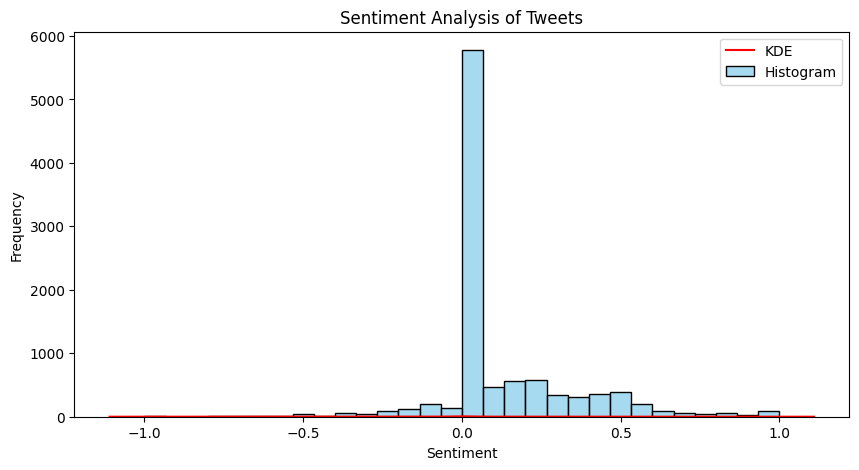

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the sentiment values
plt.figure(figsize=(10, 5))
sns.histplot(data=tweets_df, x="sentiment", bins=30, color="skyblue", label="Histogram")
sns.kdeplot(data=tweets_df["sentiment"], color="red", label="KDE")
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.legend()
plt.show()

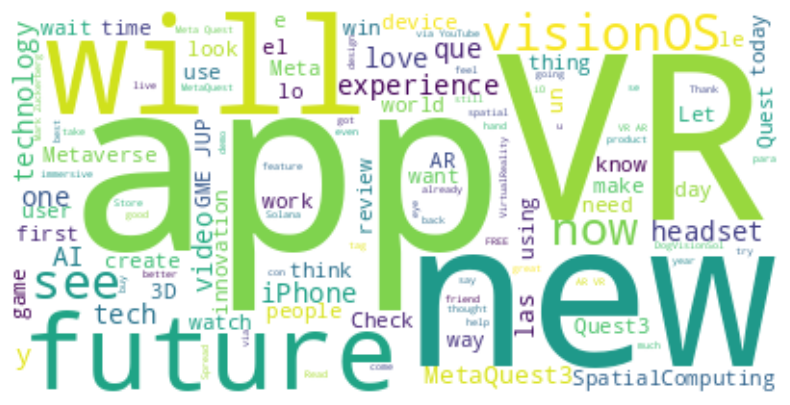

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "AppleVisionPro",
        "https",
        "AppleVision",
        "apple",
        "vision",
        "pro",
        "Vision",
        "Pro",
        "VisionPro",
        "t",
        "amp",
        "AVP",
        "avp",
        "co",
        "de",
        "s",
        "o",
        "en",
        "la",
    ]
)

# Concatenate all the tweet texts into one text
text = " ".join(tweet for tweet in tweets_df["translated_text"])

# Create a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "AppleVisionPro",
        "https",
        "AppleVision",
        "apple",
        "vision",
        "pro",
        "Vision",
        "Pro",
        "VisionPro",
        "will",
        "t",
        "s",
        "co",
        "app",
        "amp",
        "la",
        "will",
        "vr",
        "VR",
        "see",
    ]
)

# Split the data into positive and negative tweets
positive_tweets = tweets_df[tweets_df["sentiment"] > 0]
negative_tweets = tweets_df[tweets_df["sentiment"] < 0]

# Concatenate all the positive tweet texts into one text
positive_text = " ".join(tweet for tweet in positive_tweets["translated_text"])

# Concatenate all the negative tweet texts into one text
negative_text = " ".join(tweet for tweet in negative_tweets["translated_text"])

# Create a color function for the positive word cloud
positive_color_func = lambda *args, **kwargs: "green"

# Create a color function for the negative word cloud
negative_color_func = lambda *args, **kwargs: "red"

# Create a word cloud for the positive tweets
positive_wordcloud = WordCloud(
    stopwords=stopwords, background_color="white", color_func=positive_color_func
).generate(positive_text)

# Create a word cloud for the negative tweets
negative_wordcloud = WordCloud(
    stopwords=stopwords, background_color="white", color_func=negative_color_func
).generate(negative_text)

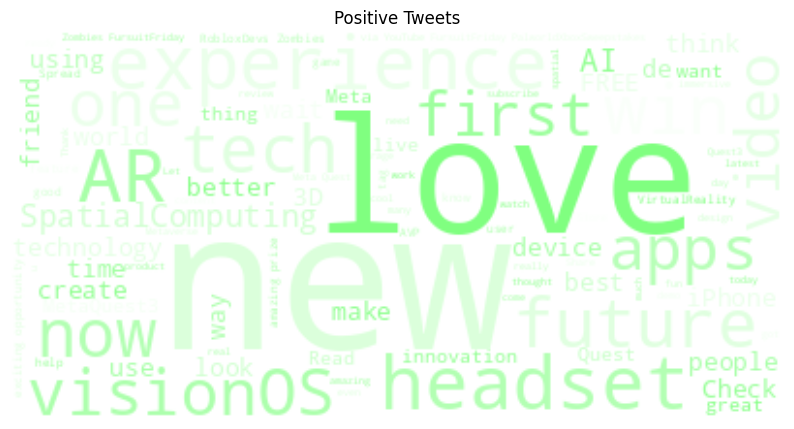

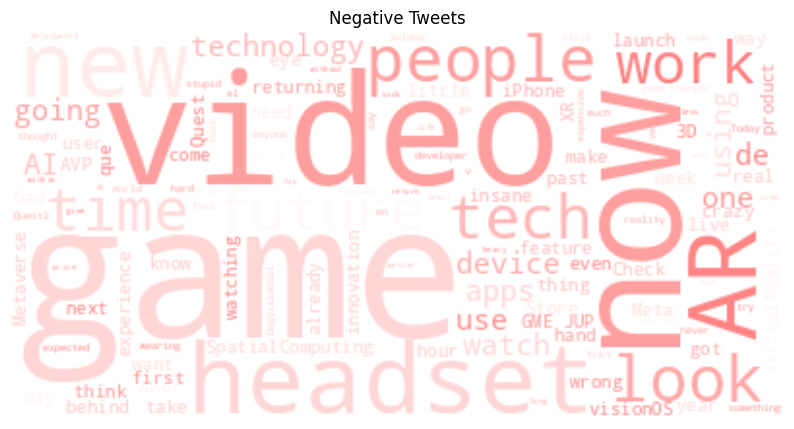

In [ ]:
from matplotlib import colors


# Create a color function for the positive word cloud
def positive_color_func(
    word, font_size, position, orientation, random_state=None, **kwargs
):
    return "hsl(120, 100%%, %d%%)" % np.random.randint(75, 100)


# Create a color function for the negative word cloud
def negative_color_func(
    word, font_size, position, orientation, random_state=None, **kwargs
):
    return "hsl(0, 100%%, %d%%)" % np.random.randint(75, 100)


# Create a word cloud for the positive tweets
positive_wordcloud = WordCloud(
    stopwords=stopwords, background_color="white", color_func=positive_color_func
).generate(positive_text)

# Create a word cloud for the negative tweets
negative_wordcloud = WordCloud(
    stopwords=stopwords, background_color="white", color_func=negative_color_func
).generate(negative_text)

# Display the positive word cloud
plt.figure(figsize=(10, 10))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Positive Tweets")
plt.axis("off")
plt.show()

# Display the negative word cloud
plt.figure(figsize=(10, 10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Negative Tweets")
plt.axis("off")
plt.show()

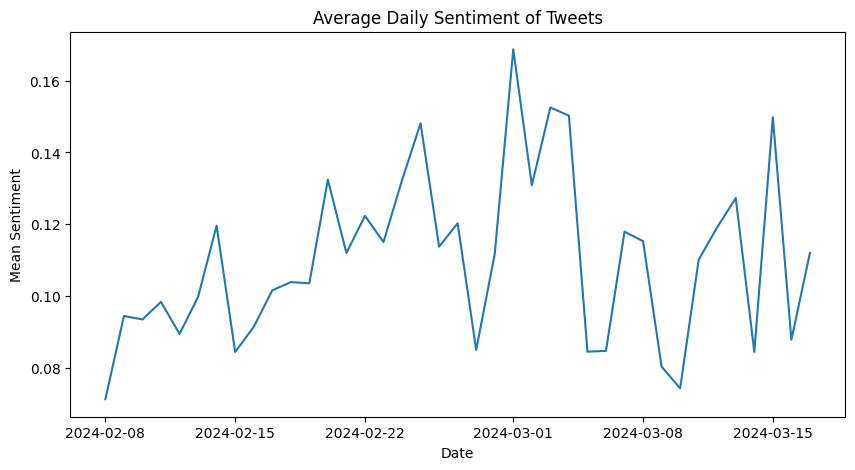

In [ ]:
# Convert the 'timestamp' column to datetime
tweets_df["createdAt"] = pd.to_datetime(tweets_df["createdAt"])

# Set the 'timestamp' column as the index
tweets_df.set_index("createdAt", inplace=True)

# Resample the data to daily intervals and compute the mean sentiment
daily_sentiment = tweets_df["sentiment"].resample("D").mean()

# Plot the daily sentiment
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sentiment)
plt.title("Average Daily Sentiment of Tweets")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment")
plt.show()

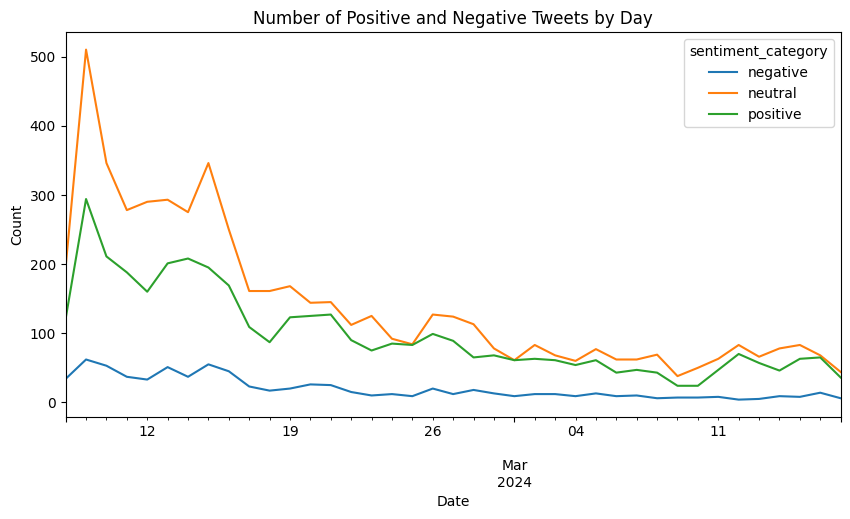

In [ ]:
import pandas as pd

# Categorize each tweet as positive or negative
tweets_df["sentiment_category"] = [
    "positive" if x > 0 else "negative" if x < 0 else "neutral"
    for x in tweets_df["sentiment"]
]
# Convert the date to datetime format and set it as the index
# tweets_df.index = pd.to_datetime(tweets_df["createdAt"])

# Resample the data by day and count the number of positive and negative tweets
daily_sentiments = (
    tweets_df.groupby("sentiment_category").resample("D").size().unstack(level=0)
)

# Plot the number of positive and negative tweets by day
daily_sentiments.plot(kind="line", figsize=(10, 5))
plt.title("Number of Positive and Negative Tweets by Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
custom_words = [
    "AppleVisionPro",
    "AppleVisionPro	",
    "AppleVisionPro	",
    "https",
    "AppleVision",
    "apple",
    "vision",
    "pro",
    "Vision",
    "Pro",
    "VisionPro",
    "VisionPro	",
    "AppleVisionPro	",
    "t",
    "amp",
    "AVP",
    "avp",
    "co",
    "de",
    "s",
    "o",
    "en",
    "la",
    "#",
    "https",
    ":",
    ".",
    "@",
    "!",
    "$",
    "?",
    ",",
    "`",
    "'",
    "’",
    "(",
    ")",
    "-",
    "_",
    ";	",
    "VR	",
    ";	",
    "&	",
    "'s",
    "matthew_hine",
    "IAM_X_IDENTITY",
    "//t.co/n63HWn14od	",
]

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


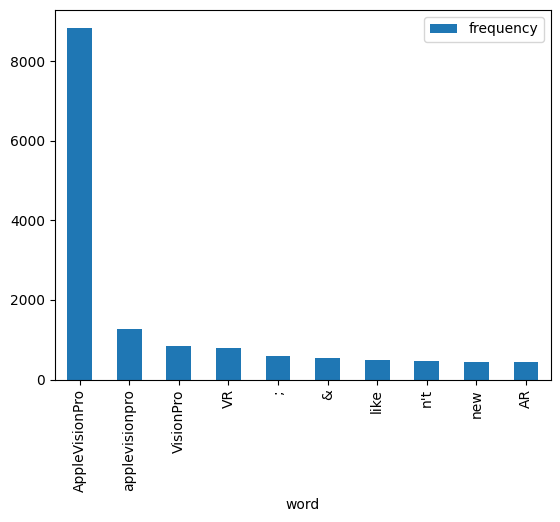

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("stopwords")

# Define the list of stopwords
stop_words = set(stopwords.words("english"))
stop_words.update(custom_words)


# Tokenize the tweets
words = nltk.word_tokenize(" ".join(tweets_df["translated_text"]))

# Remove stopwords from the tokenized words
filtered_words = [word for word in words if word.casefold() not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Create a DataFrame from the word frequencies
freq_df = pd.DataFrame(list(word_freq.items()), columns=["word", "frequency"])

# Sort the DataFrame by frequency
freq_df = freq_df.sort_values(by="frequency", ascending=False)

# Plot the 10 most frequent words
freq_df.head(10).plot(kind="bar", x="word", y="frequency")
plt.show()

In [ ]:
freq_df.head(10)

,word,frequency
10,AppleVisionPro,8841
318,applevisionpro,1276
109,VisionPro,851
274,VR,788
1536,;,596
1072,&,539
202,like,497
2,n't,472
234,new,443
273,AR,431


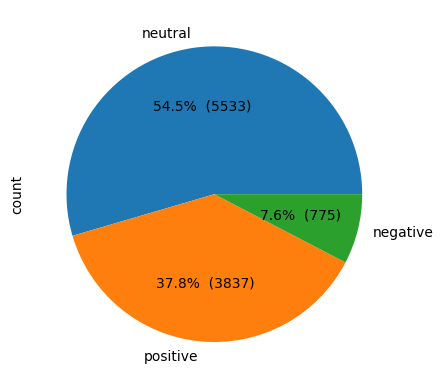

In [ ]:
# Define a function to format the autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{p:.1f}%  ({v:d})".format(p=pct, v=val)

    return my_autopct


# Plot the sentiment distribution
sentiment_counts.plot(kind="pie", autopct=make_autopct(sentiment_counts))
plt.show()

In [ ]:
# Sort the DataFrame by the "sentiment" column in descending order and select the top 10 rows
top_positive_tweets = tweets_df.sort_values(by="sentiment", ascending=False).head(20)

# Sort the DataFrame by the "sentiment" column in ascending order and select the top 10 rows
top_negative_tweets = tweets_df.sort_values(by="sentiment", ascending=True).head(200)

In [ ]:
pd.set_option("display.max_colwidth", None)
top_positive_tweets["translated_text"].to_frame().style.set_properties(
    **{"text-align": "left"}
)
# top_positive_tweets["translated_text"]

,translated_text
createdAt,
2024-02-16 23:02:47,You can now watch spatial videos recorded with your #iPhone15Pro on the #MetaQuest3 ! One of the best #AppleVisionPro features🔥 https://t.co/ZDXxbTroxW
2024-02-25 23:31:18,It's just the beginning of the myth. #TheMaxia #Legendary team starts because of us. Let me introduce our scientist architect. We know Web3 has #nolimits so we #build; just keep your eyes open.👀 #freemint #web3 #web3community #NFT #virtualreality #AppleVisionPro #Polygon #Music https://t.co/iUG7WZMVMg
2024-02-09 08:07:49,Amazing!!! 🔥🔥🔥🔥🔥🔥🔥🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 @Apple #applevisionpro #vr #veve #nft
2024-03-15 14:38:26,@JustHoopsGame #AppleVisionPro best of !
2024-02-20 01:19:39,Steve would be proud! https://t.co/gLui9bVcy0 #AppleVisionPro #NFTCommunity #NFT全員プレゼント https://t.co/MXyGBc2WQ7
2024-03-15 14:36:18,@UploadVR @JustHoopsGame #AppleVisionPro best of!
2024-03-11 06:00:01,Find the best accessories for your Apple Vision Pro. Elevate your experience with must-have add-ons that enhance functionality and style. https://t.co/HbwfJ9ZWjd #AppleVisionPro #Apple https://t.co/qNZJt8tXjU
2024-02-12 10:07:49,I demoed the Apple Vision Pro yesterday and I can't stop thinking about it. Breathtaking is all I can say. Bravo @Apple and @tim_cook #AppleVisionPro
2024-02-19 20:31:19,Now upgrade your Macbook Pro and Desktop with this Awesome abstract Wallpaper Link In Here 👇 30% OFF https://t.co/aeGbbfSKyL #wallpaper #Wallpapers #abstractart #AppleVisionPro #iPhone #macbook #artifexwall https://t.co/0TfFHS3cWR


In [ ]:
exclude_ids = [
    1759373989435031808,
    1758569894835040638,
    1758863342095958311,
    1769052894861414763,
    1769052894861414763,
    1758945937307955521,
    1769050330585817192,
    1760829885256454312,
    1755692326855295344,
    1763435428550459814,
    1766090654545830087,
    1757578549077156056,
    1769018535261651443,
    1757762812284391769,
    1757496416669233307,
    1759521068199415902,
    1761599795033002451,
]

top_negative_tweets = top_negative_tweets[~top_negative_tweets["id"].isin(exclude_ids)]

top_negative_tweets[["id", "translated_text"]].reset_index().style.set_properties(
    **{"text-align": "left"}
)

,createdAt,id,translated_text
0,2024-02-12 12:14:38,1757136148277711212,The Apple Vision Pro is Terrifying via: WollBowers #technology #TechInnovation #technologicaladvancements #TechnologicalInnovation #technews #TechNewsUpdate #TechNewsToday #applevisionpro #AR #VR #augmentedreality https://t.co/XLSQ6rvMi8
1,2024-02-13 23:25:47,1757667436877545593,Zuck cooking Cook's ass over reality headset is insane ! #Zuckerberg #AppleVisionPro #Quest3
2,2024-02-09 14:13:13,1756078827711705434,Brutal murder of #AppleVisionPro https://t.co/NbSTsSdI3H
3,2024-02-14 05:21:10,1757756871371378900,Tell me you hate #AppleVisionPro without telling me … 😂
4,2024-02-11 11:39:09,1756764831539933582,hate this fr #applevisionpro #visionpro #applevisionproreview #visionproreview https://t.co/J0AkMZE9ur
5,2024-02-08 18:01:11,1755773809528131885,And just like that…. this look isn’t as annoying as it used to be. #AppleVisionPro https://t.co/ty5YbP79SC
6,2024-02-12 21:22:09,1757273934137844046,"Yep, it's happening. The morons are in the outdoors. #AppleVisionPro https://t.co/0zt0bf7Wb4"
7,2024-02-14 18:21:39,1757953286257119287,The misinformation goes crazy! #AppleVisionPro #apple #Apple #visionpro #MetaQuest3 #metaquest #VisionPro #applevisionpro https://t.co/bQoCoN3obT
8,2024-02-08 22:25:59,1755840448294461944,"Yeah, these goggles make you look crazy! #AppleVisionPro #apple #VisionPro https://t.co/W37sH2ojQs"
9,2024-03-15 02:54:49,1768576578039214129,Omg sick 🤒 #AppleVisionPro #Adani #2023MAMAAWARDS #19ปีไม่มีใครรู้ #NCT127_NEOCITY_THE_UNITY #Abhisha #TopChef #AEWBigBusiness #Abhisha https://t.co/Tcy7xOQ8vm
